<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/WISDM/wisdm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/WISDM_ar_v1.1_raw.txt", header=None, on_bad_lines='skip').dropna()

In [ ]:
df

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.69;
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.73;
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.69;
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.73;


In [ ]:
df.columns = ['user', 'activity', 'timestamp', 'x', 'y', 'z']
df['z'] = df['z'].str.replace(';', '')
df=df.drop(columns=['timestamp']) #timestamp 열은 분석에 불필요하므로 제거한다.
df.head()

,user,activity,x,y,z
0,33,Jogging,-0.694638,12.680544,0.50395286
1,33,Jogging,5.012288,11.264028,0.95342433
2,33,Jogging,4.903325,10.882658,-0.08172209
3,33,Jogging,-0.612916,18.496431,3.0237172
4,33,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df.isnull().sum()

,0
user,0
activity,0
x,0
y,0
z,0


In [ ]:
df['activity'].value_counts()

,count
activity,
Walking,418393
Jogging,336445
Upstairs,122869
Downstairs,100425
Sitting,59939
Standing,48394


In [ ]:
#문자열로 되어 있는 숫자들을 실수로 바꿔주자
df['x']=df['x'].astype(float)
df['y']=df['y'].astype(float)
df['z']=df['z'].astype(float)

In [ ]:
#라벨 인코딩 (activity를 숫자로)
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['activity'] = label.fit_transform(df['activity'])
df.head()

,user,activity,x,y,z
0,33,1,-0.694638,12.680544,0.503953
1,33,1,5.012288,11.264028,0.953424
2,33,1,4.903325,10.882658,-0.081722
3,33,1,-0.612916,18.496431,3.023717
4,33,1,-1.184970,12.108489,7.205164


In [ ]:
X=df.drop(columns=["activity"])
y=df["activity"]
X

,user,x,y,z
0,33,-0.694638,12.680544,0.503953
1,33,5.012288,11.264028,0.953424
2,33,4.903325,10.882658,-0.081722
3,33,-0.612916,18.496431,3.023717
4,33,-1.184970,12.108489,7.205164
...,...,...,...,...
1086461,19,9.000000,-1.570000,1.690000
1086462,19,9.040000,-1.460000,1.730000
1086463,19,9.080000,-1.380000,1.690000
1086464,19,9.000000,-1.460000,1.730000


In [ ]:
y

,activity
0,1
1,1
2,1
3,1
4,1
...,...
1086461,2
1086462,2
1086463,2
1086464,2


In [ ]:
users=sorted(df['user'].unique())
print(users)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36)]


In [ ]:
#train, test, val 분리하기
train_users=[u for u in users if u<=28]
val_users=[u for u in users if 28<u<=32]
test_users=[u for u in users if u>32]

#사용자 그룹에 따라 DataFrame 생성
train_df=df[df['user'].isin(train_users)].copy()
val_df=df[df['user'].isin(val_users)].copy()
test_df=df[df['user'].isin(test_users)].copy()

print("-----사용자 기반 데이터 분할-----")
print(f"훈련용 사용자 수: {len(train_users)}명, 데이터 수: {len(train_df)}")
print(f"검증용 사용자 수: {len(val_users)}명, 데이터 수: {len(val_df)}")
print(f"테스트용 사용자 수: {len(test_users)}명, 데이터 수: {len(test_df)}")

-----사용자 기반 데이터 분할-----
훈련용 사용자 수: 28명, 데이터 수: 823043
검증용 사용자 수: 4명, 데이터 수: 143367
테스트용 사용자 수: 4명, 데이터 수: 120055


In [ ]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler

features=['x','y','z']
scaler=StandardScaler()
scaler.fit(train_df[features])

train_df[features]=scaler.transform(train_df[features])
val_df[features]=scaler.transform(val_df[features])
test_df[features]=scaler.transform(test_df[features])

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
def segments(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x'].values[i:i+time_steps]
        ys = df['y'].values[i:i+time_steps]
        zs = df['z'].values[i:i+time_steps]

        win_labels = df[label_name].values[i:i+time_steps].astype(int)
        label = np.bincount(win_labels).argmax()
        segments.append([xs, ys, zs])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [ ]:
TIME_PERIOD=80
STEP_DISTANCE=40
LABEL='activity'

In [ ]:
x_train, y_train=segments(train_df, TIME_PERIOD, STEP_DISTANCE, LABEL)
x_val, y_val=segments(val_df, TIME_PERIOD, STEP_DISTANCE, LABEL)
x_test, y_test=segments(test_df, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [ ]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical

num_classes=label.classes_.size
y_train_hot=to_categorical(y_train, num_classes)
y_val_hot=to_categorical(y_val, num_classes)
y_test_hot=to_categorical(y_test, num_classes)

print("훈련데이터:", x_train.shape, y_train_hot.shape)
print("검증데이터", x_val.shape, y_val_hot.shape)

훈련데이터: (20575, 80, 3) (20575, 6)
검증데이터 (3583, 80, 3) (3583, 6)


In [ ]:
x_train.shape, x_test.shape, x_train.shape[0]

((20575, 80, 3), (3000, 80, 3), 20575)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], TIME_PERIOD, 3, 1)
x_val = x_val.reshape(x_val.shape[0], TIME_PERIOD, 3, 1)
x_test = x_test.reshape(x_test.shape[0], TIME_PERIOD, 3, 1)

In [ ]:
x_train.shape, x_val.shape

((20575, 80, 3, 1), (3583, 80, 3, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:

model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = (TIME_PERIOD,3,1)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 79, 2, 16)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 79, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 78, 1, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 78, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       159,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,358 (634.21 KB)

 Trainable params: 162,358 (634.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.utils import class_weight
import numpy as np
class_weights=class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict=dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history=model.fit(
    x_train, y_train_hot,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val_hot),
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

Epoch 1/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4234 - loss: 1.4195 - val_accuracy: 0.6737 - val_loss: 0.9373
Epoch 2/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6459 - loss: 0.8223 - val_accuracy: 0.7156 - val_loss: 0.8734
Epoch 3/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7080 - loss: 0.6934 - val_accuracy: 0.7471 - val_loss: 0.8726
Epoch 4/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7331 - loss: 0.6403 - val_accuracy: 0.7435 - val_loss: 0.8827
Epoch 5/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7519 - loss: 0.5943 - val_accuracy: 0.7572 - val_loss: 0.8972
Epoch 6/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7794 - loss: 0.5724 - val_accuracy: 0.7653 - val_loss: 0.8847
Epoch 7/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7954 - loss: 0.5324 - val_accuracy: 0.7720 - val_loss: 0.9364
Epoch 8/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8044 - loss: 0.5151 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epochs_run = len(history.history['loss'])
  epoch_range = range(1, epochs_run+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

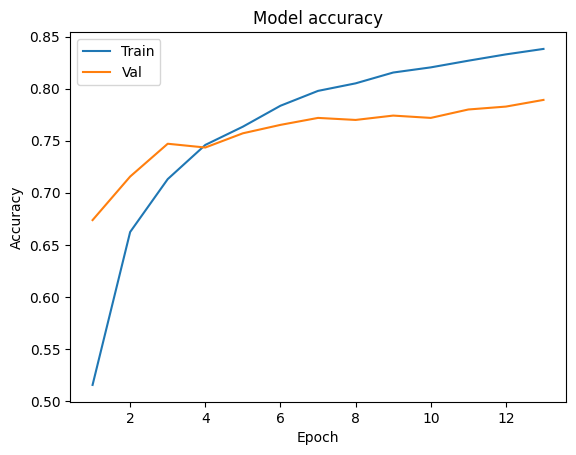

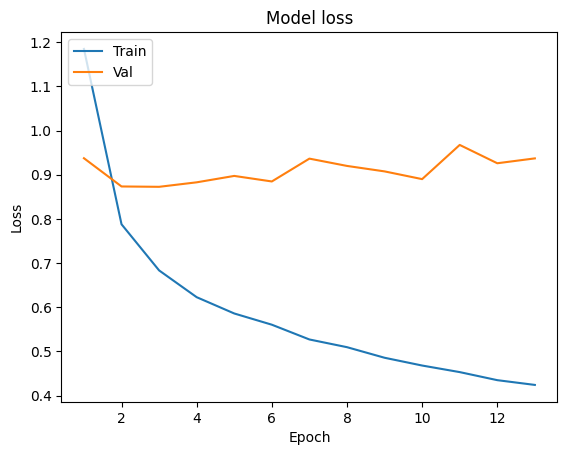

In [ ]:
plot_learningCurve(history, 10)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


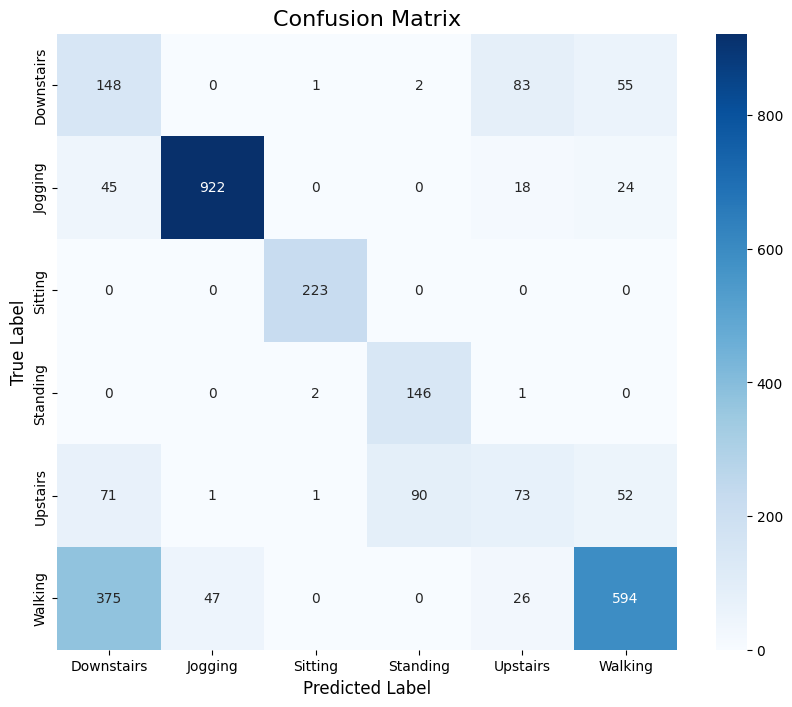

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

#혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

#시각화
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label.classes_, yticklabels=label.classes_)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_hot, verbose=0)
print("="*30)
print(f"테스트 데이터 정확도 (Accuracy): {accuracy:.4f}")
print(f"테스트 데이터 손실 (Loss): {loss:.4f}")
print("="*30)

테스트 데이터 정확도 (Accuracy): 0.7020
테스트 데이터 손실 (Loss): 0.7349


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n===== 분류 리포트 =====")
print(classification_report(y_test, y_pred, target_names=label.classes_))

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

===== 분류 리포트 =====
              precision    recall  f1-score   support

  Downstairs       0.23      0.51      0.32       289
     Jogging       0.95      0.91      0.93      1009
     Sitting       0.98      1.00      0.99       223
    Standing       0.61      0.98      0.75       149
    Upstairs       0.36      0.25      0.30       288
     Walking       0.82      0.57      0.67      1042

    accuracy                           0.70      3000
   macro avg       0.66      0.70      0.66      3000
weighted avg       0.76      0.70      0.72      3000

